In [1]:
import pandas as pd
from pycaret.classification import *
from tqdm import tqdm

# 데이콘 점수

In [2]:
# 제출 점수(제출 날짜) : 0.6505599843(2021-12-21 14:52:09)

# 설정

In [3]:
# 'id', 'contents_open_dt' 제거 : ⭕
# 모든 값이 1인 'person_prefer_f', 'person_prefer_g' 열 제거 : ⭕
# person_rn, contents_rn 제거 : ⭕
# 중복 샘플 제거 : ❌

In [4]:
# 차이가 비교적 많이 나는 특성(25개)만 훈련/예측 : ⭕

# d_l_match_yn
# d_m_match_yn
# d_s_match_yn

# h_l_match_yn

# person_attribute_a
# person_attribute_a_1
# person_attribute_b
# person_prefer_c

# person_prefer_d_1
# person_prefer_d_2
# person_prefer_d_3

# person_prefer_e

# person_prefer_h_1
# person_prefer_h_2
# person_prefer_h_3
##############################
# contents_attribute_i
# contents_attribute_a

# contents_attribute_j
# contents_attribute_j_1
# contents_attribute_c

# contents_attribute_l
# contents_attribute_d

# contents_attribute_m
# contents_attribute_e

# contents_attribute_h

In [5]:
# pycaret, cat
# tune : ❌(자체 점수 떨어짐.)
# combine
# 순서형 특성 수치형으로 지정 : ⭕
    # 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

# 데이터 불러오기

In [6]:
# ../data/train.csv
# ../data/test.csv
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# 데이터 확인

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [8]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      46404 non-null  int64 
 1   d_l_match_yn            46404 non-null  bool  
 2   d_m_match_yn            46404 non-null  bool  
 3   d_s_match_yn            46404 non-null  bool  
 4   h_l_match_yn            46404 non-null  bool  
 5   h_m_match_yn            46404 non-null  bool  
 6   h_s_match_yn            46404 non-null  bool  
 7   person_attribute_a      46404 non-null  int64 
 8   person_attribute_a_1    46404 non-null  int64 
 9   person_attribute_b      46404 non-null  int64 
 10  person_prefer_c         46404 non-null  int64 
 11  person_prefer_d_1       46404 non-null  int64 
 12  person_prefer_d_2       46404 non-null  int64 
 13  person_prefer_d_3       46404 non-null  int64 
 14  person_prefer_e         46404 non-null  int64 
 15  pe

In [10]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


# 필요 데이터 추출

In [11]:
# person_rn :  사용자번호
# contents_rn :  컨텐츠번호
# contents_open_dt :  컨텐츠 열람 일시

## 훈련에 의미가 적은 열 제거

In [12]:
test_col = ['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
 'person_attribute_a', 'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
 'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
 'person_prefer_e',
 'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3', 
 'contents_attribute_i', 'contents_attribute_a',
 'contents_attribute_j', 'contents_attribute_j_1', 'contents_attribute_c',
 'contents_attribute_l', 'contents_attribute_d',
 'contents_attribute_m', 'contents_attribute_e',
 'contents_attribute_h']
target = ['target']
train_col = test_col + target
len(train_col), len(test_col)

(26, 25)

In [13]:
train = train[train_col]
test = test[test_col]

In [14]:
# train = train.drop(['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g'], axis=1) 
# test = test.drop(['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g'], axis=1)

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   d_l_match_yn            501951 non-null  bool 
 1   d_m_match_yn            501951 non-null  bool 
 2   d_s_match_yn            501951 non-null  bool 
 3   h_l_match_yn            501951 non-null  bool 
 4   person_attribute_a      501951 non-null  int64
 5   person_attribute_a_1    501951 non-null  int64
 6   person_attribute_b      501951 non-null  int64
 7   person_prefer_c         501951 non-null  int64
 8   person_prefer_d_1       501951 non-null  int64
 9   person_prefer_d_2       501951 non-null  int64
 10  person_prefer_d_3       501951 non-null  int64
 11  person_prefer_e         501951 non-null  int64
 12  person_prefer_h_1       501951 non-null  int64
 13  person_prefer_h_2       501951 non-null  int64
 14  person_prefer_h_3       501951 non-null  int64
 15  

In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   d_l_match_yn            46404 non-null  bool 
 1   d_m_match_yn            46404 non-null  bool 
 2   d_s_match_yn            46404 non-null  bool 
 3   h_l_match_yn            46404 non-null  bool 
 4   person_attribute_a      46404 non-null  int64
 5   person_attribute_a_1    46404 non-null  int64
 6   person_attribute_b      46404 non-null  int64
 7   person_prefer_c         46404 non-null  int64
 8   person_prefer_d_1       46404 non-null  int64
 9   person_prefer_d_2       46404 non-null  int64
 10  person_prefer_d_3       46404 non-null  int64
 11  person_prefer_e         46404 non-null  int64
 12  person_prefer_h_1       46404 non-null  int64
 13  person_prefer_h_2       46404 non-null  int64
 14  person_prefer_h_3       46404 non-null  int64
 15  contents_attribute_

## 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경

In [17]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
train = train.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
train.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j,contents_attribute_j_1,contents_attribute_c,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,target
0,True,True,True,False,1,4,3,5,275,370,369,8,4,95,59,3,3,2,10,1,1608,275,1,4,139,1
1,False,False,False,True,1,3,4,1,114,181,175,4,131,101,96,1,3,1,5,1,1608,275,1,4,133,0
2,False,False,False,True,2,0,3,5,464,175,452,3,54,263,56,3,1,2,10,1,1600,94,1,4,53,0
3,False,False,False,True,2,0,2,5,703,705,704,3,72,227,2,1,3,1,5,1,1608,275,5,3,74,0
4,True,True,True,False,1,3,4,5,275,370,369,4,214,210,209,1,1,2,10,1,1608,275,1,4,74,0


In [18]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
test = test.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
test.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j,contents_attribute_j_1,contents_attribute_c,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h
0,True,False,False,True,1,1,2,1,857,851,1227,4,263,56,49,1,3,2,10,1,1147,839,1,5,263
1,False,False,False,True,2,0,2,2,683,1086,662,2,258,263,49,1,3,1,5,1,1611,278,1,4,263
2,True,False,False,True,2,3,2,1,514,790,1233,0,177,170,171,3,3,1,3,1,1817,490,3,4,177
3,True,False,False,True,1,2,2,5,114,181,175,4,177,170,171,3,3,1,5,1,101,150,5,3,177
4,True,False,False,True,1,6,4,5,1082,1078,1056,5,178,177,4,3,1,1,5,1,985,1097,1,4,177


# 매칭 경우의 수 별로 데이터 분리

In [19]:
import itertools

In [20]:
# 단계(4단계)별로 [0, 1]의 선택지 있는 모든 경우의 수 출력
match_cases = list(itertools.product(*[[0,1] for i in range(4)]))
match_cases

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

## train

In [22]:
for num in range(16):
    c0, c1, c2, c3 = match_cases[num]
    tmp = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
        (train['h_l_match_yn']==c3)]
    print(num, match_cases[num], tmp.shape)

0 (0, 0, 0, 0) (36913, 26)
1 (0, 0, 0, 1) (149770, 26)
2 (0, 0, 1, 0) (0, 26)
3 (0, 0, 1, 1) (0, 26)
4 (0, 1, 0, 0) (0, 26)
5 (0, 1, 0, 1) (0, 26)
6 (0, 1, 1, 0) (0, 26)
7 (0, 1, 1, 1) (0, 26)
8 (1, 0, 0, 0) (32635, 26)
9 (1, 0, 0, 1) (149006, 26)
10 (1, 0, 1, 0) (0, 26)
11 (1, 0, 1, 1) (0, 26)
12 (1, 1, 0, 0) (12804, 26)
13 (1, 1, 0, 1) (45566, 26)
14 (1, 1, 1, 0) (20261, 26)
15 (1, 1, 1, 1) (54996, 26)


In [ ]:
# 0 (0, 0, 0, 0) (36913, 26)
# 1 (0, 0, 0, 1) (149770, 26)
# 8 (1, 0, 0, 0) (32635, 26)
# 9 (1, 0, 0, 1) (149006, 26)
# 12 (1, 1, 0, 0) (12804, 26)
# 13 (1, 1, 0, 1) (45566, 26)
# 14 (1, 1, 1, 0) (20261, 26)
# 15 (1, 1, 1, 1) (54996, 26)

In [23]:
num = 0
c0, c1, c2, c3 = match_cases[num]
train_df1 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)]
match_cases[num], train_df1.shape

((0, 0, 0, 0), (36913, 26))

In [24]:
num = 1
c0, c1, c2, c3 = match_cases[num]
train_df2 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)]
match_cases[num], train_df2.shape

((0, 0, 0, 1), (149770, 26))

In [25]:
num = 8
c0, c1, c2, c3 = match_cases[num]
train_df3 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)]
match_cases[num], train_df3.shape

((1, 0, 0, 0), (32635, 26))

In [26]:
num = 9
c0, c1, c2, c3 = match_cases[num]
train_df4 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)]
match_cases[num], train_df4.shape

((1, 0, 0, 1), (149006, 26))

In [27]:
num = 12
c0, c1, c2, c3 = match_cases[num]
train_df5 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)]
match_cases[num], train_df5.shape

((1, 1, 0, 0), (12804, 26))

In [28]:
num = 13
c0, c1, c2, c3 = match_cases[num]
train_df6 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)]
match_cases[num], train_df6.shape

((1, 1, 0, 1), (45566, 26))

In [29]:
num = 14
c0, c1, c2, c3 = match_cases[num]
train_df7 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)]
match_cases[num], train_df7.shape

((1, 1, 1, 0), (20261, 26))

In [30]:
num = 15
c0, c1, c2, c3 = match_cases[num]
train_df8 = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)]
match_cases[num], train_df8.shape

((1, 1, 1, 1), (54996, 26))

In [31]:
train_df_list= [train_df1, train_df2, train_df3, train_df4,
        train_df5, train_df6, train_df7, train_df8]

## test

In [43]:
for num in range(16):
    c0, c1, c2, c3 = match_cases[num]
    tmp = test[(test['d_l_match_yn']==c0)&(test['d_m_match_yn']==c1)&(test['d_s_match_yn']==c2)&
        (test['h_l_match_yn']==c3)]
    print(num, match_cases[num], tmp.shape)

0 (0, 0, 0, 0) (3343, 25)
1 (0, 0, 0, 1) (14263, 25)
2 (0, 0, 1, 0) (0, 25)
3 (0, 0, 1, 1) (0, 25)
4 (0, 1, 0, 0) (0, 25)
5 (0, 1, 0, 1) (0, 25)
6 (0, 1, 1, 0) (0, 25)
7 (0, 1, 1, 1) (0, 25)
8 (1, 0, 0, 0) (2821, 25)
9 (1, 0, 0, 1) (13477, 25)
10 (1, 0, 1, 0) (0, 25)
11 (1, 0, 1, 1) (0, 25)
12 (1, 1, 0, 0) (1137, 25)
13 (1, 1, 0, 1) (4287, 25)
14 (1, 1, 1, 0) (1788, 25)
15 (1, 1, 1, 1) (5288, 25)


In [44]:
# 0 (0, 0, 0, 0) (3343, 25)
# 1 (0, 0, 0, 1) (14263, 25)
# 8 (1, 0, 0, 0) (2821, 25)
# 9 (1, 0, 0, 1) (13477, 25)
# 12 (1, 1, 0, 0) (1137, 25)
# 13 (1, 1, 0, 1) (4287, 25)
# 14 (1, 1, 1, 0) (1788, 25)
# 15 (1, 1, 1, 1) (5288, 25)

In [34]:
num = 0
c0, c1, c2, c3 = match_cases[num]
test_df1 = test[(test['d_l_match_yn']==c0)&(test['d_m_match_yn']==c1)&(test['d_s_match_yn']==c2)&
    (test['h_l_match_yn']==c3)]
match_cases[num], test_df1.shape

((0, 0, 0, 0), (3343, 25))

In [36]:
num = 1
c0, c1, c2, c3 = match_cases[num]
test_df2 = test[(test['d_l_match_yn']==c0)&(test['d_m_match_yn']==c1)&(test['d_s_match_yn']==c2)&
    (test['h_l_match_yn']==c3)]
match_cases[num], test_df2.shape

((0, 0, 0, 1), (14263, 25))

In [37]:
num = 8
c0, c1, c2, c3 = match_cases[num]
test_df3 = test[(test['d_l_match_yn']==c0)&(test['d_m_match_yn']==c1)&(test['d_s_match_yn']==c2)&
    (test['h_l_match_yn']==c3)]
match_cases[num], test_df3.shape

((1, 0, 0, 0), (2821, 25))

In [38]:
num = 9
c0, c1, c2, c3 = match_cases[num]
test_df4 = test[(test['d_l_match_yn']==c0)&(test['d_m_match_yn']==c1)&(test['d_s_match_yn']==c2)&
    (test['h_l_match_yn']==c3)]
match_cases[num], test_df4.shape

((1, 0, 0, 1), (13477, 25))

In [39]:
num = 12
c0, c1, c2, c3 = match_cases[num]
test_df5 = test[(test['d_l_match_yn']==c0)&(test['d_m_match_yn']==c1)&(test['d_s_match_yn']==c2)&
    (test['h_l_match_yn']==c3)]
match_cases[num], test_df5.shape

((1, 1, 0, 0), (1137, 25))

In [40]:
num = 13
c0, c1, c2, c3 = match_cases[num]
test_df6 = test[(test['d_l_match_yn']==c0)&(test['d_m_match_yn']==c1)&(test['d_s_match_yn']==c2)&
    (test['h_l_match_yn']==c3)]
match_cases[num], test_df6.shape

((1, 1, 0, 1), (4287, 25))

In [41]:
num = 14
c0, c1, c2, c3 = match_cases[num]
test_df7 = test[(test['d_l_match_yn']==c0)&(test['d_m_match_yn']==c1)&(test['d_s_match_yn']==c2)&
    (test['h_l_match_yn']==c3)]
match_cases[num], test_df7.shape

((1, 1, 1, 0), (1788, 25))

In [42]:
num = 15
c0, c1, c2, c3 = match_cases[num]
test_df8 = test[(test['d_l_match_yn']==c0)&(test['d_m_match_yn']==c1)&(test['d_s_match_yn']==c2)&
    (test['h_l_match_yn']==c3)]
match_cases[num], test_df8.shape

((1, 1, 1, 1), (5288, 25))

In [46]:
test_df_list= [test_df1, test_df2, test_df3, test_df4,
        test_df5, test_df6, test_df7, test_df8]

# 모델 학습/예측

In [19]:
# 순서형 특성 수치형으로 지정 : ⭕
    # 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [45]:
ex = setup(train_df1, target='target', n_jobs=-1, session_id=0, verbose=False, silent=True, 
 fold=5, fold_shuffle=True, combine_rare_levels=True,
 numeric_features=['person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'])

In [47]:
compare_models(sort='F1')
# 29m

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.4811,0.5749,0.9027,0.4421,0.5935,0.0690,0.1112,0.0680
dt,Decision Tree Classifier,0.5500,0.5393,0.4724,0.4645,0.4684,0.0783,0.0783,0.2320
catboost,CatBoost Classifier,0.6189,0.6490,0.3751,0.5697,0.4523,0.1787,0.1879,7.4580
knn,K Neighbors Classifier,0.5583,0.5549,0.4199,0.4706,0.4437,0.0794,0.0798,0.8480
lightgbm,Light Gradient Boosting Machine,0.6120,0.6430,0.3497,0.5604,0.4306,0.1597,0.1699,0.6640
qda,Quadratic Discriminant Analysis,0.5095,0.5023,0.4574,0.4228,0.4296,0.0046,0.0049,0.1680
rf,Random Forest Classifier,0.6129,0.6342,0.3313,0.5664,0.4180,0.1569,0.1696,1.9640
et,Extra Trees Classifier,0.5951,0.6016,0.3241,0.5285,0.4018,0.1216,0.1299,2.0840
ada,Ada Boost Classifier,0.5971,0.6173,0.2926,0.5370,0.3787,0.1173,0.1292,0.7400
gbc,Gradient Boosting Classifier,0.6061,0.6323,0.2691,0.5646,0.3644,0.1283,0.1468,2.7200


GaussianNB(priors=None, var_smoothing=1e-09)

In [60]:
# 단계(4단계)별로 [0, 1]의 선택지 있는 모든 경우의 수 출력
match_cases = list(itertools.product(*[[0,1] for i in range(4)]))
match_cases

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

In [61]:
pred = pd.DataFrame()
num_list = [0, 1, 8, 9, 12, 13, 14, 15]

for num in tqdm(num_list):
  c0, c1, c2, c3 = match_cases[num]
  tmp_train = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
    (train['h_l_match_yn']==c3)]
  tmp_test = test[(test['d_l_match_yn']==c0)&(test['d_m_match_yn']==c1)&(test['d_s_match_yn']==c2)&
    (test['h_l_match_yn']==c3)]

  ex = setup(tmp_train, target='target', n_jobs=-1, session_id=0, verbose=False, silent=True, 
    fold=5, fold_shuffle=True, combine_rare_levels=True,
    numeric_features=['person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e']
  )
  model = create_model('nb')
  tmp_pred = predict_model(model, tmp_test)
  pred = pd.concat([pred, tmp_pred])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6051,0.5537,0.8542,0.6382,0.7306,0.0460,0.0536
1,0.6126,0.5601,0.8471,0.6455,0.7327,0.0738,0.0835
2,0.6083,0.5428,0.8423,0.6432,0.7294,0.0642,0.0724
3,0.6150,0.5595,0.8616,0.6443,0.7372,0.0705,0.0820
4,0.6057,0.5515,0.8409,0.6415,0.7278,0.0575,0.0650
Mean,0.6093,0.5535,0.8492,0.6425,0.7315,0.0624,0.0713
SD,0.0039,0.0063,0.0077,0.0025,0.0033,0.0099,0.0111


100%|██████████| 8/8 [00:57<00:00,  7.14s/it]


In [62]:
pred.iloc[:,-2:].head()

,Label,Score
5,1,0.8272
9,1,0.8879
12,1,0.9172
25,1,0.9253
26,0,1.0000


In [63]:
pred['Label']

5        1
9        1
12       1
25       1
26       0
        ..
46350    1
46357    1
46358    1
46391    1
46396    1
Name: Label, Length: 46404, dtype: int32

In [64]:
pred['Label'].value_counts()

1    38054
0     8350
Name: Label, dtype: int64

# 제출파일 생성

In [65]:
# ../data/sample_submission.csv
sub = pd.read_csv('../data/sample_submission.csv')
sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      46404 non-null  int64
 1   target  46404 non-null  int64
dtypes: int64(2)
memory usage: 725.2 KB


In [66]:
sub.head()

,id,target
0,0,-1
1,1,-1
2,2,-1
3,3,-1
4,4,-1


In [67]:
sub['target'] = pred['Label']
sub.to_csv('sub_ver1.7.csv', index=False)

In [70]:
sub.head(10)

,id,target
0,0,1
1,1,1
2,2,0
3,3,1
4,4,1
5,5,1
6,6,1
7,7,0
8,8,0
9,9,1


# 모델 분석 그래프

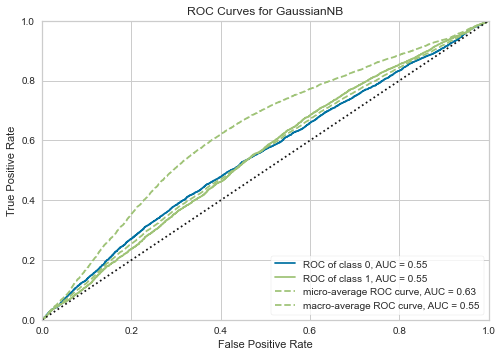

In [54]:
plot_model(model)

# 경우의 수별 F1 score 확인

In [71]:
# 단계(4단계)별로 [0, 1]의 선택지 있는 모든 경우의 수 출력
match_cases = list(itertools.product(*[[0,1] for i in range(4)]))
match_cases

[(0, 0, 0, 0),
 (0, 0, 0, 1),
 (0, 0, 1, 0),
 (0, 0, 1, 1),
 (0, 1, 0, 0),
 (0, 1, 0, 1),
 (0, 1, 1, 0),
 (0, 1, 1, 1),
 (1, 0, 0, 0),
 (1, 0, 0, 1),
 (1, 0, 1, 0),
 (1, 0, 1, 1),
 (1, 1, 0, 0),
 (1, 1, 0, 1),
 (1, 1, 1, 0),
 (1, 1, 1, 1)]

In [72]:
num_list = [0, 1, 8, 9, 12, 13, 14, 15]

In [81]:
num = num_list[0]
c0, c1, c2, c3 = match_cases[num]

tmp_train = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
  (train['h_l_match_yn']==c3)]

ex = setup(tmp_train, target='target', n_jobs=-1, session_id=0, verbose=False, silent=True, 
  fold=5, fold_shuffle=True, combine_rare_levels=True,
  numeric_features=['person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e']
)
model = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4870,0.5764,0.9041,0.4453,0.5967,0.0783,0.1244
1,0.4874,0.5746,0.9000,0.4453,0.5958,0.0780,0.1225
2,0.4785,0.5725,0.8995,0.4406,0.5915,0.0643,0.1036
3,0.4758,0.5773,0.9106,0.4399,0.5932,0.0627,0.1052
4,0.4769,0.5738,0.8994,0.4397,0.5906,0.0619,0.1002
Mean,0.4811,0.5749,0.9027,0.4421,0.5935,0.0690,0.1112
SD,0.0051,0.0017,0.0043,0.0026,0.0023,0.0075,0.0102


In [82]:
compare_models(sort='F1')
# 2m 5s

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.4811,0.5749,0.9027,0.4421,0.5935,0.0690,0.1112,0.1120
dt,Decision Tree Classifier,0.5500,0.5393,0.4724,0.4645,0.4684,0.0783,0.0783,0.3480
catboost,CatBoost Classifier,0.6189,0.6490,0.3751,0.5697,0.4523,0.1787,0.1879,8.8960
knn,K Neighbors Classifier,0.5583,0.5549,0.4199,0.4706,0.4437,0.0794,0.0798,1.1340
lightgbm,Light Gradient Boosting Machine,0.6120,0.6430,0.3497,0.5604,0.4306,0.1597,0.1699,0.8320
qda,Quadratic Discriminant Analysis,0.5095,0.5023,0.4574,0.4228,0.4296,0.0046,0.0049,0.2140
rf,Random Forest Classifier,0.6129,0.6342,0.3313,0.5664,0.4180,0.1569,0.1696,2.2540
et,Extra Trees Classifier,0.5951,0.6016,0.3241,0.5285,0.4018,0.1216,0.1299,2.4300
ada,Ada Boost Classifier,0.5971,0.6173,0.2926,0.5370,0.3787,0.1173,0.1292,0.9520
gbc,Gradient Boosting Classifier,0.6061,0.6323,0.2691,0.5646,0.3644,0.1283,0.1468,3.3420


GaussianNB(priors=None, var_smoothing=1e-09)

In [83]:
num = num_list[1]
c0, c1, c2, c3 = match_cases[num]

tmp_train = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
  (train['h_l_match_yn']==c3)]

ex = setup(tmp_train, target='target', n_jobs=-1, session_id=0, verbose=False, silent=True, 
  fold=5, fold_shuffle=True, combine_rare_levels=True,
  numeric_features=['person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e']
)
model = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.4955,0.5872,0.8589,0.4365,0.5788,0.0938,0.1317
1,0.4956,0.5871,0.8560,0.4364,0.5780,0.0932,0.1301
2,0.4962,0.5852,0.8655,0.4373,0.5810,0.0966,0.1369
3,0.4946,0.5869,0.8655,0.4364,0.5803,0.0941,0.1339
4,0.4913,0.5814,0.8538,0.4339,0.5754,0.0863,0.1212
Mean,0.4947,0.5856,0.8600,0.4361,0.5787,0.0928,0.1307
SD,0.0017,0.0022,0.0048,0.0012,0.0020,0.0034,0.0053


In [84]:
compare_models(sort='F1')
# 7m 25s

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.4947,0.5856,0.8600,0.4361,0.5787,0.0928,0.1307,0.1940
catboost,CatBoost Classifier,0.6406,0.6839,0.3980,0.5798,0.4720,0.2136,0.2223,21.0620
dt,Decision Tree Classifier,0.5655,0.5502,0.4710,0.4624,0.4667,0.1001,0.1001,1.2220
knn,K Neighbors Classifier,0.5807,0.5778,0.4101,0.4774,0.4412,0.1087,0.1095,5.8440
rf,Random Forest Classifier,0.6321,0.6658,0.3504,0.5725,0.4347,0.1848,0.1971,10.3320
lightgbm,Light Gradient Boosting Machine,0.6318,0.6720,0.3400,0.5741,0.4270,0.1812,0.1947,1.2880
et,Extra Trees Classifier,0.6153,0.6341,0.3365,0.5375,0.4138,0.1495,0.1586,11.0120
ada,Ada Boost Classifier,0.6118,0.6360,0.2656,0.5389,0.3558,0.1217,0.1374,3.8700
gbc,Gradient Boosting Classifier,0.6203,0.6512,0.2373,0.5715,0.3353,0.1290,0.1535,14.5900
svm,SVM - Linear Kernel,0.5205,0.0000,0.4488,0.4445,0.3109,0.0181,0.0342,6.8820


GaussianNB(priors=None, var_smoothing=1e-09)

In [85]:
num = num_list[2]
c0, c1, c2, c3 = match_cases[num]

tmp_train = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
  (train['h_l_match_yn']==c3)]

ex = setup(tmp_train, target='target', n_jobs=-1, session_id=0, verbose=False, silent=True, 
  fold=5, fold_shuffle=True, combine_rare_levels=True,
  numeric_features=['person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e']
)
model = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5292,0.5681,0.8807,0.5133,0.6486,0.0671,0.0939
1,0.5373,0.5785,0.8807,0.5183,0.6525,0.0829,0.1136
2,0.5314,0.5860,0.8988,0.5143,0.6543,0.0718,0.1051
3,0.5242,0.5781,0.9148,0.5099,0.6548,0.0581,0.0920
4,0.5258,0.5706,0.8957,0.5111,0.6509,0.0607,0.0895
Mean,0.5296,0.5763,0.8941,0.5134,0.6522,0.0681,0.0988
SD,0.0046,0.0064,0.0128,0.0029,0.0023,0.0088,0.0091


In [86]:
compare_models(sort='F1')
# 2m 3s

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5296,0.5763,0.8941,0.5134,0.6522,0.0681,0.0988,0.0580
catboost,CatBoost Classifier,0.5900,0.6215,0.5733,0.5866,0.5798,0.1797,0.1798,10.6640
lightgbm,Light Gradient Boosting Machine,0.5804,0.6134,0.5650,0.5763,0.5706,0.1604,0.1604,0.3620
gbc,Gradient Boosting Classifier,0.5776,0.6090,0.5575,0.5740,0.5656,0.1547,0.1548,2.9880
rf,Random Forest Classifier,0.5825,0.6132,0.5472,0.5817,0.5639,0.1642,0.1645,2.0900
ridge,Ridge Classifier,0.5616,0.0000,0.5622,0.5551,0.5586,0.1232,0.1232,0.0800
lda,Linear Discriminant Analysis,0.5613,0.5879,0.5620,0.5547,0.5583,0.1226,0.1226,0.3180
ada,Ada Boost Classifier,0.5715,0.5991,0.5405,0.5692,0.5544,0.1422,0.1424,0.8360
lr,Logistic Regression,0.5580,0.5831,0.5384,0.5535,0.5459,0.1155,0.1156,2.1260
et,Extra Trees Classifier,0.5614,0.5883,0.5328,0.5583,0.5452,0.1222,0.1223,2.1180


GaussianNB(priors=None, var_smoothing=1e-09)

In [87]:
num = num_list[3]
c0, c1, c2, c3 = match_cases[num]

tmp_train = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
  (train['h_l_match_yn']==c3)]

ex = setup(tmp_train, target='target', n_jobs=-1, session_id=0, verbose=False, silent=True, 
  fold=5, fold_shuffle=True, combine_rare_levels=True,
  numeric_features=['person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e']
)
model = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5462,0.5543,0.9129,0.5424,0.6805,0.0488,0.0748
1,0.5492,0.5582,0.9302,0.5433,0.6860,0.0531,0.0870
2,0.5495,0.5620,0.9231,0.5439,0.6845,0.0548,0.0865
3,0.5470,0.5605,0.9074,0.5432,0.6796,0.0511,0.0764
4,0.5471,0.5529,0.9088,0.5432,0.6800,0.0512,0.0770
Mean,0.5478,0.5576,0.9165,0.5432,0.6821,0.0518,0.0803
SD,0.0013,0.0035,0.0088,0.0005,0.0026,0.0020,0.0053


In [88]:
compare_models(sort='F1')
# 7m 22s

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.5294,0.5000,1.0000,0.5294,0.6923,0.0000,0.0000,0.1420
nb,Naive Bayes,0.5478,0.5576,0.9165,0.5432,0.6821,0.0518,0.0803,0.2020
gbc,Gradient Boosting Classifier,0.5767,0.6003,0.7822,0.5735,0.6618,0.1308,0.1425,13.7360
lightgbm,Light Gradient Boosting Machine,0.5866,0.6144,0.7541,0.5850,0.6589,0.1550,0.1633,1.2960
catboost,CatBoost Classifier,0.5920,0.6215,0.7300,0.5932,0.6545,0.1693,0.1748,23.1640
ridge,Ridge Classifier,0.5593,0.0000,0.7746,0.5606,0.6505,0.0941,0.1034,0.1920
lda,Linear Discriminant Analysis,0.5593,0.5706,0.7743,0.5607,0.6504,0.0941,0.1034,0.7920
lr,Logistic Regression,0.5565,0.5674,0.7561,0.5601,0.6435,0.0900,0.0974,9.4160
ada,Ada Boost Classifier,0.5679,0.5866,0.7351,0.5714,0.6430,0.1170,0.1231,3.3020
rf,Random Forest Classifier,0.5824,0.6093,0.6778,0.5922,0.6321,0.1543,0.1562,10.0900


DummyClassifier(constant=None, random_state=0, strategy='prior')

In [89]:
num = num_list[4]
c0, c1, c2, c3 = match_cases[num]

tmp_train = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
  (train['h_l_match_yn']==c3)]

ex = setup(tmp_train, target='target', n_jobs=-1, session_id=0, verbose=False, silent=True, 
  fold=5, fold_shuffle=True, combine_rare_levels=True,
  numeric_features=['person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e']
)
model = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5538,0.5734,0.8663,0.5569,0.6779,0.0529,0.0688
1,0.5566,0.5699,0.8714,0.5583,0.6806,0.0583,0.0764
2,0.5681,0.5809,0.8558,0.5672,0.6823,0.0877,0.1078
3,0.5709,0.5768,0.8620,0.5686,0.6852,0.0929,0.1152
4,0.5592,0.5706,0.9012,0.5580,0.6892,0.0582,0.0830
Mean,0.5617,0.5743,0.8713,0.5618,0.6830,0.0700,0.0902
SD,0.0066,0.0041,0.0158,0.0050,0.0039,0.0168,0.0181


In [90]:
compare_models(sort='F1')
# 51s

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.5421,0.5000,1.0000,0.5421,0.7030,0.0000,0.0000,0.0440
nb,Naive Bayes,0.5617,0.5743,0.8713,0.5618,0.6830,0.0700,0.0902,0.0420
gbc,Gradient Boosting Classifier,0.5914,0.6085,0.7608,0.5965,0.6687,0.1556,0.1636,0.9720
lda,Linear Discriminant Analysis,0.5701,0.5839,0.7594,0.5789,0.6569,0.1085,0.1158,0.0880
ridge,Ridge Classifier,0.5696,0.0000,0.7596,0.5785,0.6568,0.1074,0.1148,0.0860
lr,Logistic Regression,0.5677,0.5789,0.7530,0.5777,0.6538,0.1043,0.1110,0.9860
catboost,CatBoost Classifier,0.5861,0.6119,0.7168,0.5987,0.6524,0.1510,0.1549,4.8240
ada,Ada Boost Classifier,0.5774,0.5961,0.7293,0.5891,0.6517,0.1298,0.1346,0.3200
lightgbm,Light Gradient Boosting Machine,0.5783,0.5945,0.6997,0.5943,0.6427,0.1366,0.1394,0.1640
rf,Random Forest Classifier,0.5789,0.6019,0.6838,0.5975,0.6377,0.1404,0.1423,0.6460


DummyClassifier(constant=None, random_state=0, strategy='prior')

In [91]:
num = num_list[5]
c0, c1, c2, c3 = match_cases[num]

tmp_train = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
  (train['h_l_match_yn']==c3)]

ex = setup(tmp_train, target='target', n_jobs=-1, session_id=0, verbose=False, silent=True, 
  fold=5, fold_shuffle=True, combine_rare_levels=True,
  numeric_features=['person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e']
)
model = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5928,0.5478,0.8537,0.6176,0.7167,0.0552,0.0653
1,0.5992,0.5449,0.8470,0.6236,0.7183,0.0762,0.0879
2,0.6079,0.5688,0.8878,0.6229,0.7321,0.0787,0.0987
3,0.5921,0.5497,0.8353,0.6203,0.7119,0.0631,0.0720
4,0.5904,0.5556,0.8080,0.6240,0.7042,0.0729,0.0796
Mean,0.5965,0.5534,0.8463,0.6217,0.7166,0.0692,0.0807
SD,0.0065,0.0085,0.0259,0.0024,0.0092,0.0088,0.0117


In [92]:
compare_models(sort='F1')
# 2m 7s

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.6034,0.5000,1.0000,0.6034,0.7526,0.0000,0.0000,0.0820
gbc,Gradient Boosting Classifier,0.6195,0.5924,0.9417,0.6219,0.7491,0.0819,0.1236,3.8440
lr,Logistic Regression,0.6073,0.5659,0.9616,0.6109,0.7471,0.0350,0.0666,2.6040
ridge,Ridge Classifier,0.6077,0.0000,0.9454,0.6135,0.7441,0.0457,0.0752,0.0640
lda,Linear Discriminant Analysis,0.6081,0.5685,0.9418,0.6143,0.7436,0.0491,0.0785,0.2760
ada,Ada Boost Classifier,0.6148,0.5807,0.9252,0.6214,0.7435,0.0777,0.1098,0.9520
lightgbm,Light Gradient Boosting Machine,0.6190,0.5947,0.9045,0.6279,0.7413,0.1008,0.1295,0.3640
catboost,CatBoost Classifier,0.6195,0.6010,0.8889,0.6312,0.7382,0.1105,0.1351,8.7300
rf,Random Forest Classifier,0.6113,0.5957,0.8366,0.6351,0.7220,0.1147,0.1275,2.5340
nb,Naive Bayes,0.5965,0.5534,0.8463,0.6217,0.7166,0.0692,0.0807,0.0660


DummyClassifier(constant=None, random_state=0, strategy='prior')

In [93]:
num = num_list[6]
c0, c1, c2, c3 = match_cases[num]

tmp_train = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
  (train['h_l_match_yn']==c3)]

ex = setup(tmp_train, target='target', n_jobs=-1, session_id=0, verbose=False, silent=True, 
  fold=5, fold_shuffle=True, combine_rare_levels=True,
  numeric_features=['person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e']
)
model = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5689,0.5638,0.8214,0.5704,0.6733,0.0968,0.1117
1,0.5566,0.5665,0.8364,0.5603,0.6710,0.0664,0.0803
2,0.5617,0.5772,0.7926,0.5678,0.6616,0.0857,0.0957
3,0.5670,0.5774,0.8428,0.5669,0.6779,0.0891,0.1070
4,0.5691,0.5785,0.8317,0.5695,0.6760,0.0958,0.1123
Mean,0.5647,0.5727,0.8250,0.5670,0.6720,0.0868,0.1014
SD,0.0048,0.0062,0.0176,0.0036,0.0057,0.0110,0.0121


In [94]:
compare_models(sort='F1')
# 1m 5s

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.5406,0.5000,1.0000,0.5406,0.7018,0.0000,0.0000,0.0460
nb,Naive Bayes,0.5647,0.5727,0.8250,0.5670,0.6720,0.0868,0.1014,0.0460
gbc,Gradient Boosting Classifier,0.5883,0.6099,0.7338,0.5970,0.6583,0.1539,0.1592,1.4780
ridge,Ridge Classifier,0.5735,0.0000,0.7462,0.5825,0.6541,0.1195,0.1259,0.0440
catboost,CatBoost Classifier,0.5946,0.6207,0.7091,0.6070,0.6541,0.1714,0.1745,6.0420
lda,Linear Discriminant Analysis,0.5737,0.5899,0.7454,0.5827,0.6540,0.1200,0.1263,0.1120
lr,Logistic Regression,0.5695,0.5869,0.7381,0.5801,0.6495,0.1119,0.1175,1.0960
lightgbm,Light Gradient Boosting Machine,0.5890,0.6112,0.7000,0.6033,0.6480,0.1606,0.1633,0.2580
ada,Ada Boost Classifier,0.5755,0.5969,0.7068,0.5896,0.6428,0.1301,0.1334,0.4640
rf,Random Forest Classifier,0.5816,0.6076,0.6807,0.5995,0.6375,0.1474,0.1491,1.0200


DummyClassifier(constant=None, random_state=0, strategy='prior')

In [95]:
num = num_list[7]
c0, c1, c2, c3 = match_cases[num]

tmp_train = train[(train['d_l_match_yn']==c0)&(train['d_m_match_yn']==c1)&(train['d_s_match_yn']==c2)&
  (train['h_l_match_yn']==c3)]

ex = setup(tmp_train, target='target', n_jobs=-1, session_id=0, verbose=False, silent=True, 
  fold=5, fold_shuffle=True, combine_rare_levels=True,
  numeric_features=['person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e']
)
model = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6051,0.5537,0.8542,0.6382,0.7306,0.0460,0.0536
1,0.6126,0.5601,0.8471,0.6455,0.7327,0.0738,0.0835
2,0.6083,0.5428,0.8423,0.6432,0.7294,0.0642,0.0724
3,0.6150,0.5595,0.8616,0.6443,0.7372,0.0705,0.0820
4,0.6057,0.5515,0.8409,0.6415,0.7278,0.0575,0.0650
Mean,0.6093,0.5535,0.8492,0.6425,0.7315,0.0624,0.0713
SD,0.0039,0.0063,0.0077,0.0025,0.0033,0.0099,0.0111


In [96]:
compare_models(sort='F1')
# 2m 27s

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dummy,Dummy Classifier,0.6268,0.5000,1.0000,0.6268,0.7706,0.0000,0.0000,0.0540
gbc,Gradient Boosting Classifier,0.6359,0.5956,0.9712,0.6376,0.7698,0.0534,0.1025,4.1600
lr,Logistic Regression,0.6275,0.5625,0.9918,0.6285,0.7695,0.0090,0.0331,3.4340
ridge,Ridge Classifier,0.6289,0.0000,0.9876,0.6301,0.7694,0.0173,0.0523,0.0680
lda,Linear Discriminant Analysis,0.6292,0.5691,0.9844,0.6309,0.7689,0.0208,0.0570,0.2900
ada,Ada Boost Classifier,0.6317,0.5845,0.9658,0.6357,0.7667,0.0439,0.0823,1.1520
lightgbm,Light Gradient Boosting Machine,0.6376,0.6021,0.9388,0.6449,0.7646,0.0835,0.1208,0.4580
catboost,CatBoost Classifier,0.6384,0.6052,0.9198,0.6494,0.7613,0.0997,0.1312,9.6380
rf,Random Forest Classifier,0.6318,0.5953,0.8736,0.6546,0.7484,0.1119,0.1298,2.8720
nb,Naive Bayes,0.6093,0.5535,0.8492,0.6425,0.7315,0.0624,0.0713,0.0800


DummyClassifier(constant=None, random_state=0, strategy='prior')